## LabelEncoder
 * class sklearn.preprocessing.LabelEncoder
 * Attributes : classes_, Holds the label for each class.
 * Method : fit, fit_transform, get_params, inverse_transform, set_params, transform

In [6]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [7]:
print('인코딩 클래스:', encoder.classes_) # 속성(클래스)에는 인코딩 전의 데이터를 출력한다.

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [11]:
print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))# inverse_transform Method -> decoding

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


## Titanic preprocessing
판다스를 이용해서 csv 읽어 오기
•필요한 칼러만 남기고 dropt
•fillna를 활용하여 결측치 처리(mean)
•LabelEncoder를 활용하여 인코딩

In [134]:
import pandas as pd

tatanic_df = pd.read_csv('./titanic_train.csv')
tatanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [135]:
tatanic_df.drop(columns = ['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Fare','Cabin'], inplace=True)

In [136]:
tatanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [137]:
tatanic_df['Age'] = tatanic_df['Age'].fillna(df['Age'].mean())
tatanic_df['Embarked'] = tatanic_df['Embarked'].fillna('S')

In [132]:
tatanic_df.isna().sum()

Survived    0
Sex         0
Age         0
Embarked    0
dtype: int64

In [133]:
encoder = LabelEncoder()
tatanic_df['Sex'] = encoder.fit_transform(tatanic_df['Sex'])
tatanic_df['Embarked'] = encoder.fit_transform(tatanic_df['Embarked'])

In [101]:
tatanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


## OneHotEncoder
 * OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None)

In [107]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)


원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [122]:
one_encoder = OneHotEncoder()
# items = item.reshape(-1,1)
# np.array(items).reshape(-1,1)
items = np.array(items).reshape(-1,1)
data = one_encoder.fit_transform(items)

In [123]:
data.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [108]:
encoder.transform(items)

array([0, 1, 4, 5, 3, 3, 2, 2])

In [109]:
labels.reshape(-1,1)

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [113]:
df = pd.read_csv('./titanic_train.csv')
one_encoder = OneHotEncoder()
trans_data = one_encoder.fit_transform([df['Sex']])
trans_data.toarray()

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

### pandas.get.dummies
 * pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [139]:
tatanic_df.loc[:,'Embarked']

In [143]:
pd.get_dummies(tatanic_df.loc[:,'Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [145]:
dummies_data = pd.get_dummies(df[['Sex', 'Embarked']])

In [153]:
# pandas를 이용하여 One-Hot Encoding처럼 데이터를 변형시켜준다.
# Age를 0과 1사이의 숫자로 스케일링 하여 학습함의 왜곡됨을 바꾼다. > 표준화한다.
pd.concat([tatanic_df, dummies_data], axis= 1).drop(columns = ['Sex','Embarked'])

,Survived,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,0,1,0,0,1
1,1,38.000000,1,0,1,0,0
2,1,26.000000,1,0,0,0,1
3,1,35.000000,1,0,0,0,1
4,0,35.000000,0,1,0,0,1
...,...,...,...,...,...,...,...
886,0,27.000000,0,1,0,0,1
887,1,19.000000,1,0,0,0,1
888,0,29.699118,1,0,0,0,1
889,1,26.000000,0,1,1,0,0


## StandardScaler
* StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [193]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [195]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### reconfirm

In [180]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler() # for을 사용할 필요 없이 표준화 가능한 라이브러리

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값') # 0에 가까운값들이다.
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값') # 1에 가까운값들이다.
print(iris_df_scaled.var())
print('\nfeature 들의 표준편차 값')
print(iris_df_scaled.std())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

feature 들의 표준편차 값
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


## MinMaxScaler
* class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

In [192]:
from sklearn.preprocessing import MinMaxScaler

mscaler = MinMaxScaler()
mscaler.fit(iris_df)
iris_mscaled = mscaler.transform(iris_df)
iris_df_mscaled = pd.DataFrame(data=iris_mscaled, columns=iris.feature_names)
print('feature 들의 최소 값')
print(iris_df_mscaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_mscaled.max())
iris_df_mscaled


feature 들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


## RobustScaler
 * RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)

In [191]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()
rbscaler.fit(iris_df)
iris_rbscaled = rbscaler.transform(iris_df)
iris_df_rbscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rbscaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


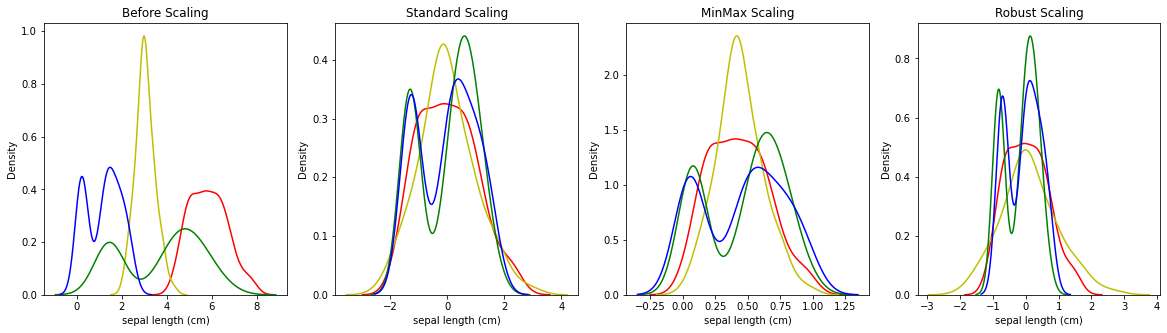

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df['petal width (cm)'], ax = ax1, color = 'b')

ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax2, color = 'b')

ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_mscaled['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_mscaled['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_mscaled['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_mscaled['petal width (cm)'], ax = ax3, color = 'b')

ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rbscaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_rbscaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_rbscaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_rbscaled['petal width (cm)'], ax = ax4, color = 'b')
plt.show()